ARIMA very popular. Time series forecasting is still a forecasting technique.<br>
Auto Regressive Integrated Moving Average<br>
p Auto regressive(number of lag observations included in the model, lag order)<br>
d Integrated if not stationery value is 1. The number of times the data is differenced to make the data stationary<br>
q Moving Average (size of the moving average window also known as moving average)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pmdarima


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib','inline')
import warnings
warnings.filterwarnings('ignore')
from pmdarima.arima import auto_arima

In [ ]:
coviddata=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/colab datas/data-DIpcH.csv')
coviddata.head()

,Date,daily_cases,Total cases,daily_recovery,Total Recovered,daily_death,Total Death
0,01-03-2020,3,3,0,0,0,0
1,02-03-2020,3,6,0,0,0,0
2,03-03-2020,2,8,0,0,0,0
3,04-03-2020,22,30,0,0,0,0
4,05-03-2020,1,31,0,0,0,0


In [ ]:
coviddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             445 non-null    object
 1   daily_cases      445 non-null    int64 
 2   Total cases      445 non-null    int64 
 3   daily_recovery   445 non-null    int64 
 4   Total Recovered  445 non-null    int64 
 5   daily_death      445 non-null    int64 
 6   Total Death      445 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 24.5+ KB


In [ ]:
index=pd.date_range(start='2020-03-01',end='2021-05-19',freq='D')
data=pd.Series(coviddata['daily_cases'].values,index)
data

2020-03-01         3
2020-03-02         3
2020-03-03         2
2020-03-04        22
2020-03-05         1
               ...  
2021-05-15    281386
2021-05-16    263533
2021-05-17    267334
2021-05-18    276110
2021-05-19    259551
Freq: D, Length: 445, dtype: int64

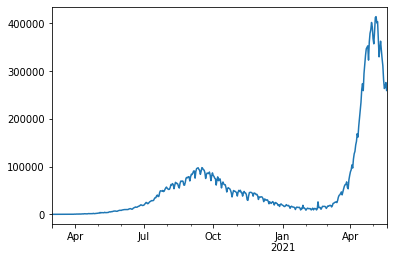

In [ ]:
data.plot()

In [ ]:
from pandas.plotting import autocorrelation_plot

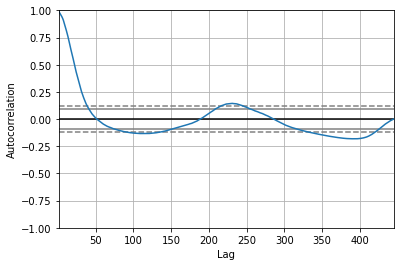

In [ ]:
autocorrelation_plot(data)
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
data.index=data.index.to_period('D')

In [ ]:
model=ARIMA(data,order=(15,1,0))
model_fit=model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  444
Model:                ARIMA(15, 1, 0)   Log Likelihood               -4331.950
Method:                       css-mle   S.D. of innovations           4135.331
Date:                Sun, 30 May 2021   AIC                           8697.899
Time:                        11:20:48   BIC                           8767.528
Sample:                    03-02-2020   HQIC                          8725.358
                         - 05-19-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        584.5671    759.878      0.769      0.442    -904.766    2073.900
ar.L1.D.y      0.0110      0.047      0.234      0.815      -0.081       0.103
ar.L2.D.y      0.0181      0.047      0.384      0.7

In [ ]:
pred=model_fit.predict(start='2021-05-20',end='2021-06-25')
pred

2021-05-20   -21396.950545
2021-05-21    -6884.748905
2021-05-22   -27047.288124
2021-05-23   -15742.278866
2021-05-24    13580.915915
2021-05-25     6463.833058
2021-05-26   -14454.369349
2021-05-27   -13706.978131
2021-05-28    -6732.741683
2021-05-29   -16920.230165
2021-05-30    -8090.120787
2021-05-31    14840.881832
2021-06-01    11544.218785
2021-06-02   -12504.281739
2021-06-03    -9591.766149
2021-06-04     -325.360333
2021-06-05   -12342.708464
2021-06-06    -1411.688528
2021-06-07    18402.085725
2021-06-08    10918.132975
2021-06-09    -8918.048882
2021-06-10    -6406.436850
2021-06-11     1885.346800
2021-06-12    -6520.382888
2021-06-13     1492.080651
2021-06-14    19217.351717
2021-06-15    10894.905823
2021-06-16    -8952.830781
2021-06-17    -4044.290021
2021-06-18     3350.187963
2021-06-19    -4371.562504
2021-06-20     3850.266104
2021-06-21    17988.880209
2021-06-22     8812.037944
2021-06-23    -8790.742928
2021-06-24    -3788.213836
2021-06-25     3797.904189
F

In [ ]:
future_df=pd.DataFrame()
future_df['prediction']= pred
future_df1=pd.concat([data,future_df])
future_df1

,0,prediction
2020-03-01,3.0,NaN
2020-03-02,3.0,NaN
2020-03-03,2.0,NaN
2020-03-04,22.0,NaN
2020-03-05,1.0,NaN
...,...,...
2021-06-21,NaN,17988.880209
2021-06-22,NaN,8812.037944
2021-06-23,NaN,-8790.742928
2021-06-24,NaN,-3788.213836


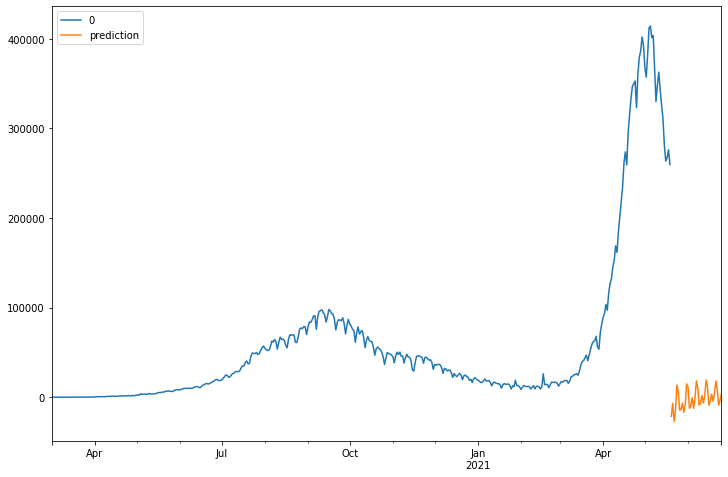

In [ ]:
future_df1[[0, 'prediction']].plot(figsize=(12, 8))